<a href="https://colab.research.google.com/github/MafeRC08/MafeRC08/blob/main/Copia_de_Estad%C3%ADstica_Descriptiva_Centralidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística Descriptiva

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# descarga de archivo
url_amz="https://raw.githubusercontent.com/NechuBM/dataset/main/precios_amazon.csv"
!wget {url_amz} -q -O precios_amazon.csv
url_eth="https://raw.githubusercontent.com/NechuBM/dataset/main/precios_ethereum.csv"
!wget {url_eth} -q -O precios_ethereum.csv
# fecha de inicio: 2021-02-01
# fecha final: 2022-04-01

In [9]:
df_amz= pd.read_csv('precios_amazon.csv', sep=";" , decimal= ",")


In [10]:
df_amz = pd.read_csv('precios_amazon.csv', sep=";", decimal=",")
df_eth = pd.read_csv('precios_ethereum.csv', sep=";", decimal=",")

In [11]:
df_amz.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2021,3242.360107,3350.26001,3235.030029,3342.879883,3342.879883,4160200
1,2/2/2021,3380.000000,3427.73999,3361.129883,3380.000000,3380.000000,7098600
2,3/2/2021,3425.010010,3434.00000,3308.620117,3312.530029,3312.530029,7088800
3,4/2/2021,3330.000000,3347.00000,3277.750000,3331.000000,3331.000000,3670700
4,5/2/2021,3319.000000,3377.00000,3302.709961,3352.149902,3352.149902,3620800


In [12]:
df_eth.head(5)

,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0,2021-01-31,1376.823608,1378.916016,1288.501587,1314.986206,1314.986206,25198853581
1,1,1,2021-02-01,1314.855225,1373.845825,1274.357788,1369.040527,1369.040527,29210670920
2,2,2,2021-02-02,1369.505127,1542.990967,1362.771240,1515.193726,1515.193726,45437142801
3,3,3,2021-02-03,1514.769653,1660.909546,1510.010254,1660.909546,1660.909546,41874566399
4,4,4,2021-02-04,1661.170166,1689.186646,1561.853516,1594.762695,1594.762695,44396871836


In [13]:
len(df_amz)

295

In [14]:
len(df_eth)

425

In [15]:
def descartar_dias(df, days):
    """ Descartar elementos del DataFrame si vienen incluidos en la lista days"""
    # crear copia para no afectar al original
    df_discard = df.copy()
    # reiniciar el índice
    df_discard.reset_index(inplace=True)
    # modificar el formato de los datos de la columna 'Date' a datetime
    df_discard['Date'] = pd.to_datetime(df_discard['Date'])
    # crear una nueva columna con los días de la semana a partir de la columna 'Date'
    df_discard['Day'] = df_discard['Date'].dt.day_name()
    # descartar días que esten en la lista 'days'
    df_discard = df_discard.loc[~df_discard['Day'].isin(days)]
    return df_discard

In [16]:
df_eth_week = descartar_dias(df_eth, ['Saturday', 'Sunday'])

In [17]:
df_eth_week.head(5)

,index,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Day
1,1,1,1,2021-02-01,1314.855225,1373.845825,1274.357788,1369.040527,1369.040527,29210670920,Monday
2,2,2,2,2021-02-02,1369.505127,1542.990967,1362.771240,1515.193726,1515.193726,45437142801,Tuesday
3,3,3,3,2021-02-03,1514.769653,1660.909546,1510.010254,1660.909546,1660.909546,41874566399,Wednesday
4,4,4,4,2021-02-04,1661.170166,1689.186646,1561.853516,1594.762695,1594.762695,44396871836,Thursday
5,5,5,5,2021-02-05,1594.793335,1756.510986,1594.793335,1718.650879,1718.650879,40108628454,Friday


In [18]:
df_amz.head(8)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2021,3242.360107,3350.260010,3235.030029,3342.879883,3342.879883,4160200
1,2/2/2021,3380.000000,3427.739990,3361.129883,3380.000000,3380.000000,7098600
2,3/2/2021,3425.010010,3434.000000,3308.620117,3312.530029,3312.530029,7088800
3,4/2/2021,3330.000000,3347.000000,3277.750000,3331.000000,3331.000000,3670700
4,5/2/2021,3319.000000,3377.000000,3302.709961,3352.149902,3352.149902,3620800
5,8/2/2021,3358.500000,3365.000000,3304.000000,3322.939941,3322.939941,3257400
6,9/2/2021,3312.489990,3338.000000,3297.840088,3305.000000,3305.000000,2203500
7,10/2/2021,3314.000000,3317.949951,3254.000000,3286.580078,3286.580078,3151600


In [19]:
precios_amz = df_amz['Close'].tolist()
precios_eth = df_eth_week['Close'].tolist()

## Medidas de Tendencia central

### Media

Forma corta de solucionarlo, usando la funcion MEAN


In [20]:
df_amz['Close'].mean()

3299.8308957661015

In [21]:
df_eth_week['Close'].mean()

2927.1955982409027

Forma larga es hacer la sumatoria con la funcion
'sum' entre 'len' sum= sumatoria, len= total de elementos


In [22]:
media_amz= sum(precios_amz)/len(precios_amz)
media_eth= sum(precios_eth)/len(precios_eth)

In [23]:
print (f' Precio medio de Amazon:,{media_amz}')
print (f' Precio medio de Ethereum:, {media_eth}')

 Precio medio de Amazon:,3299.830895766101
 Precio medio de Ethereum:, 2927.1955982409027


### Moda

In [32]:
df_amz['Close'].mode()

,Close
0,3052.030029


### Mediana

### Resultado esperado

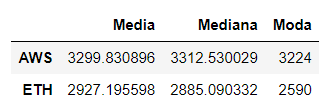